In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

# Get the least busy backend
#provider = IBMQ.get_provider(hub='ibm-q')
#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
#print("least busy backend: ", backend)

# Run our circuit
#job = execute(qc, backend=backend, shots=shots)

# Monitoring our job
#from qiskit.tools.monitor import job_monitor
#job_monitor(job)

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Problem 1-(a)

In [3]:
# backend
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

backend = Aer.get_backend('qasm_simulator')
print("Provider: ", backend)

Provider:  qasm_simulator


In [4]:
def create_bell_pair(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control
    
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.z(qubit) # To send 10 we apply an Z-gate
    elif msg == "01":
        qc.x(qubit) # To send 01 we apply a X-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Failed")
        
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [5]:
from numpy.random import randint
import numpy as np

# Alice's bit = b4b3b2b1
n = 4 
a_bits = randint(2, size=n) #alice_bits
message = str(a_bits[3])+str(a_bits[2])+str(a_bits[1])+str(a_bits[0])
print(a_bits)
print("Message: ", message)

[1 0 0 1]
Message:  1001


In [6]:
# Parameter
measure = 0 #record the length of measurement_result
bob_s = 0 #record the symbol error
bob_b = 0 #record the bit error
first_part = str(a_bits[0]) + str(a_bits[1])
second_part = str(a_bits[2]) + str(a_bits[3])

# Superdense Coding
qc = QuantumCircuit(4)
    
create_bell_pair(qc, 1, 0)
create_bell_pair(qc, 3, 2)
    
encode_message(qc, 0, first_part)
encode_message(qc, 2, second_part)    

# After recieving qubit 0, Bob applies the recovery protocol:
decode_message(qc, 0, 1)
decode_message(qc, 2, 3)

print("First part: ", first_part)
print("Second part: ", second_part)

qc.draw()

First part:  10
Second part:  01


┌───┐┌───┐     ┌───┐
q_0: ─────┤ X ├┤ Z ├──■──┤ H ├
     ┌───┐└─┬─┘└───┘┌─┴─┐└───┘
q_1: ┤ H ├──■───────┤ X ├─────
     └───┘┌───┐┌───┐└───┘┌───┐
q_2: ─────┤ X ├┤ X ├──■──┤ H ├
     ┌───┐└─┬─┘└───┘┌─┴─┐└───┘
q_3: ┤ H ├──■───────┤ X ├─────
     └───┘          └───┘

In [7]:
# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()
    
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
    
# Calculate the symbol/bit error rate
for key in measurement_result:
    measure += measurement_result[key]
    # first part
    if (first_part == key[3]+key[2]):
        bob_s += measurement_result[key]/2
    if (first_part[0] == key[3]):
        bob_b += measurement_result[key]/4
    if (first_part[1] == key[2]):
        bob_b += measurement_result[key]/4
    # second_part
    if (second_part == key[1]+key[0]):
        bob_s += measurement_result[key]/2
    if (second_part[0] == key[1]):
        bob_b += measurement_result[key]/4
    if (second_part[1] == key[0]):
        bob_b += measurement_result[key]/4

# Symbol Error Rate
s_rate = (1 - (bob_s/measure))*100
print("Symbol Error Rate: %2.f%%" % s_rate)

# Bit Error Rate
b_rate = (1 - (bob_b/measure))*100
print("Bit Error Rate: %2.f%%" % b_rate)

{'1001': 1024}
Symbol Error Rate:  0%
Bit Error Rate:  0%


In [8]:
# Problem 1-(b)

In [9]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit
job = execute(qc, backend=backend, shots=shots)

ibmqfactory.load_account:WARNING:2020-10-19 02:13:51,991: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_santiago


In [10]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


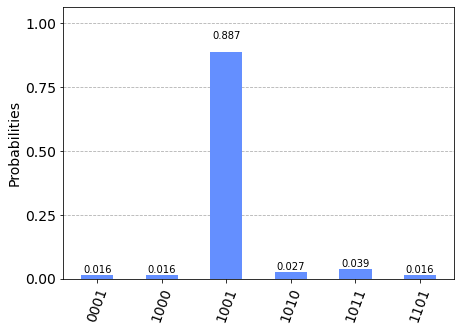

In [11]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [12]:
correct_results = result.get_counts(qc)
print("Message: ", message)
print("Measurement result: ", correct_results)
# Parameter
measure = 0 #record the length of measurement_result
bob_s = 0 #record the symbol error
bob_b = 0 #record the bit error
first_part = str(message[0]) + str(message[1])
second_part = str(message[2]) + str(message[3])

# Calculate the symbol/bit error rate
for key in correct_results:
    measure += correct_results[key]
    # first part
    if (first_part == key[0:2]):
        bob_s += correct_results[key]/2
    if (first_part[0] == key[0]):
        bob_b += correct_results[key]/4
    if (first_part[1] == key[1]):
        bob_b += correct_results[key]/4
    # second_part
    if (second_part == key[2:4]):
        bob_s += correct_results[key]/2
    if (second_part[0] == key[2]):
        bob_b += correct_results[key]/4
    if (second_part[1] == key[3]):
        bob_b += correct_results[key]/4

# Symbol Error Rate
s_rate = (1 - (bob_s/measure))*100
print("Symbol Error Rate: %.3f%%" % s_rate)

# Bit Error Rate
b_rate = (1 - (bob_b/measure))*100
print("Bit Error Rate: %.3f%%" % b_rate)

Message:  1001
Measurement result:  {'0001': 4, '1000': 4, '1001': 227, '1010': 7, '1011': 10, '1101': 4}
Symbol Error Rate: 5.664%
Bit Error Rate: 3.516%
